#**Milestone 3: New Orleans Rental Data**

**Olivia Meyer and Sydney Wade**

https://github.com/sydneywade/sydneywade.github.io/blob/main/Data%20Science%20Final.html


### Introduction

This project is a collaboration between Olivia Meyer and Sydney Wade for Introduction to Data Science (CMPS 3160-01) with Saad Hassan. The goal for the project is to examine which variables correspond to areas of a high volume of short-term rental properties in New Orleans, then predict whether a short-term rental property is likely to be within a close range of a grocery store or bar.



#### Housekeeping
These lines of code allow for the installation of all libraries that are used throughout the project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## Data Preprocessing

### Table 1
The first table is from the City of New Orleans Open Data (data.nola.gov). This data set includes information about permit requests for short-term rental properties in New Orleans, the permit’s property status, and the status of the permit request. The team chose this data set because it includes variables of approved permits, such as permit type, residential subtype, property location, and status of the request. Each of these variables will be relevant in answering the research question by providing insight of what elements are predictive of a short-term rental permit application and subsequent approval.

In [ ]:
df = pd.read_csv('Short-Term_Rental_Permit_Applications_20240307.csv')
df.head()

,Permit Number,Address,Permit Type,Residential Subtype,Current Status,Expired,Expiration Date,Bedroom Limit,Guest Occupancy Limit,Link,...,Operator Phone,Operator Email,Operator Permit Number,License Holder Name,Application Date,Issue_Date,Reference Code,X,Y,Location
0,NaN,NaN,Short Term Rental,NaN,Pending,No,NaN,NaN,NaN,https://onestopapp.nola.gov/Redirect.aspx?Sear...,...,NaN,NaN,NaN,Amber Carollo,NaN,NaN,WJ2PSP,-1.000000e+00,-1.00000,"(28.098890706026218, -101.51779913517808)"
1,NaN,2235 S Carrollton Ave,Short Term Rental,NaN,Duplicate,Yes,NaN,NaN,NaN,https://onestopapp.nola.gov/Redirect.aspx?Sear...,...,NaN,NaN,NaN,Joel W Roberts,11/03/2017,NaN,X53Q33,3.664667e+06,531074.94000,"(29.954772257164215, -90.12123689791639)"
2,NaN,NaN,Short Term Rental,NaN,Pending,No,NaN,NaN,NaN,https://onestopapp.nola.gov/Redirect.aspx?Sear...,...,NaN,NaN,NaN,Stephen H. Gogreve,NaN,NaN,DNKFSX,3.668272e+06,518686.22000,"(29.920601933504535, -90.11027363368682)"
3,NaN,888 Girod St Apt 201,Short Term Rental Residential Owner,NaN,Withdrawn,Yes,NaN,NaN,NaN,https://onestopapp.nola.gov/Redirect.aspx?Sear...,...,NaN,NaN,NaN,700 Baronne Street LLC,04/13/2021,NaN,CDD6LG,3.679783e+06,528694.20000,"(29.9477777103789, -90.07359090767176)"
4,NaN,216 Chartres ST,Short Term Rental,Temporary STR,Denied,Yes,NaN,NaN,NaN,https://onestopapp.nola.gov/Redirect.aspx?Sear...,...,NaN,NaN,NaN,Karen Hanchey,04/10/2017,NaN,LZ728Y,3.681842e+06,530887.53594,"(29.953746218012867, -90.06701104024313)"


#### Cleaning Table 1
Short-term rentals are the most common type of permits. Short-term rental residential owner and commercial owner are the second and third most common types of permits, respectively. This project aims to analyze data about only approved or actively-operating short-term rental properties, so all variables that were irrelevant to the goals of this project, including duplicate addresses, permit numbers, expiration status, expiration date, link, operator name, operator phone number, operator email, operator permit number, and reference code, were dropped from the data frame. Bedroom limit and guest occupancy limit were dropped from the data frame, as these variables appear in table 2. Finally, address NaN values were dropped from the data frame, as information about a property with an unknown address will be irrelevant to the goals of this project.

In [ ]:
df = pd.read_csv('Short-Term_Rental_Permit_Applications_20240307.csv')
df = df.dropna(subset = ["Address"])
df = df.drop_duplicates( subset = ["Address"],  keep='first')
df = df.drop(['Permit Number', 'Expired', "Expiration Date", "Bedroom Limit", "Guest Occupancy Limit"], axis=1)
df = df.drop(['Link', 'Operator Name', "Operator Phone", "Operator Email", "Operator Permit Number", "Reference Code"], axis=1)
#Dropped colums such as permit number and housing information such as bedroom limit and guest occupancy limit as the following data set has
#more exhaustive information regarding these characateritics

df.head()

,Address,Permit Type,Residential Subtype,Current Status,License Holder Name,Application Date,Issue_Date,X,Y,Location
1,2235 S Carrollton Ave,Short Term Rental,NaN,Duplicate,Joel W Roberts,11/03/2017,NaN,3.664667e+06,531074.94000,"(29.954772257164215, -90.12123689791639)"
3,888 Girod St Apt 201,Short Term Rental Residential Owner,NaN,Withdrawn,700 Baronne Street LLC,04/13/2021,NaN,3.679783e+06,528694.20000,"(29.9477777103789, -90.07359090767176)"
4,216 Chartres ST,Short Term Rental,Temporary STR,Denied,Karen Hanchey,04/10/2017,NaN,3.681842e+06,530887.53594,"(29.953746218012867, -90.06701104024313)"
5,930 Nashville Ave,Short Term Rental,Accessory STR,Denied,Benjamin Hatfield,04/12/2017,NaN,3.665575e+06,519548.13222,"(29.923050796241498, -90.11875729902609)"
6,1428 Joliet ST Apt B,Short Term Rental,Temporary STR,Denied,Claudia Moniz,04/22/2017,NaN,3.661505e+06,530058.02867,"(29.95206767635065, -90.13125554996512)"


### Table 2
The second table is from the City of New Orleans Open Data (data.nola.gov). This data set includes information about short-term vacation rental properties in New Orleans. This data set provides insight on factors such as guest limit, bedroom limit, location, and whether the owner is commercial or residential, which will be helpful to the analysis of the qualities of each short-term rental property.

In [ ]:
df_vacation = pd.read_csv('Vacation_Rentals__Hotels__B_B__short-term_rentals__etc.__20240307.csv')
df_vacation.head()

,Name,Address,Type,Bedroom limit,Guest limit,Expiration date,Location,x,y
0,4444 S Galvez St,4444 S Galvez St,Short Term Rental Residential Owner,1.0,2.0,02/18/2024 11:59:00 PM,"(29.9443943986815, -90.1050029665776)",3.669848e+06,527355.900000
1,431 Pelican Ave,431 Pelican Ave,Short Term Rental Residential Owner,3.0,6.0,03/14/2024 11:59:00 PM,"(29.9528011358107, -90.0515659776536)",3.686737e+06,530598.250000
2,5601 Charlotte Dr,5601 Charlotte Dr,Short Term Rental Residential Owner,5.0,10.0,03/16/2024 11:59:00 PM,"(30.0148005628673, -90.0717193366645)",3.680107e+06,553072.800000
3,2507 Bell St,2507 Bell St,Short Term Rental Commercial Owner,3.0,6.0,04/17/2024 11:59:00 PM,"(29.9761377084348, -90.0770016778175)",3.678590e+06,538995.100000
4,DREAMING TREE HOTEL,1525 PRYTANIA ST,4701 - HOTELS (EXC CASINO HOTELS) & MOTELS,NaN,NaN,NaN,"(29.9382381387242, -90.0747519816312)",3.679453e+06,525221.222909


### Cleaning Table 2
Variables that were irrelevant to the goals of this project, including name, type, x, y, and expiration date of application were dropped from the data frame.


In [ ]:

df_vacation = pd.read_csv('Vacation_Rentals__Hotels__B_B__short-term_rentals__etc.__20240307.csv')
df_vacation = df_vacation.drop(["Name", "Type", "x", "y", "Expiration date"], axis=1)
display(df_vacation)


,Address,Bedroom limit,Guest limit,Location
0,4444 S Galvez St,1.0,2.0,"(29.9443943986815, -90.1050029665776)"
1,431 Pelican Ave,3.0,6.0,"(29.9528011358107, -90.0515659776536)"
2,5601 Charlotte Dr,5.0,10.0,"(30.0148005628673, -90.0717193366645)"
3,2507 Bell St,3.0,6.0,"(29.9761377084348, -90.0770016778175)"
4,1525 PRYTANIA ST,NaN,NaN,"(29.9382381387242, -90.0747519816312)"
...,...,...,...,...
1189,606 Iberville St Apt 3A,2.0,4.0,"(29.9535376984007, -90.0676685080303)"
1190,512 S Salcedo St,3.0,4.0,"(29.9643962123194, -90.0946177025817)"
1191,822 Baronne St Apt 202,3.0,6.0,"(29.9459488067063, -90.0741578172454)"
1192,2919 Gravier St Unit 101,1.0,2.0,"(29.9622597361717, -90.0947245415022)"


### Merged Table
Following the initial data preprocessing, this table was created using an inner merge of cleaned table 1 and cleaned table 2 on the address variable to gain more data and insight on the characteristics of properties that are being rented for vacation use in New Orleans.

In [ ]:
df_merge = df.merge(df_vacation, left_on="Address", right_on="Address", how='inner')
df_merge["Latitude"] = 0
df_merge["Longitude"] = 0
df_merge[["Latitude", "Longitude"]] = df_merge["Location_x"].str.split(',', expand=True)
df_merge["Latitude"] = df_merge["Latitude"].apply(lambda x: x.replace('(', ''))
df_merge["Longitude"] = df_merge["Longitude"].apply(lambda x: x.replace(')', ''))
df_merge["Longitude"].dtype
df_merge["Longitude"]= df_merge["Longitude"].astype(float)
df_merge["Latitude"]= df_merge["Latitude"].astype(float)
display(df)
display(df_vacation)



,Address,Permit Type,Residential Subtype,Current Status,License Holder Name,Application Date,Issue_Date,X,Y,Location
1,2235 S Carrollton Ave,Short Term Rental,NaN,Duplicate,Joel W Roberts,11/03/2017,NaN,3.664667e+06,531074.94000,"(29.954772257164215, -90.12123689791639)"
3,888 Girod St Apt 201,Short Term Rental Residential Owner,NaN,Withdrawn,700 Baronne Street LLC,04/13/2021,NaN,3.679783e+06,528694.20000,"(29.9477777103789, -90.07359090767176)"
4,216 Chartres ST,Short Term Rental,Temporary STR,Denied,Karen Hanchey,04/10/2017,NaN,3.681842e+06,530887.53594,"(29.953746218012867, -90.06701104024313)"
5,930 Nashville Ave,Short Term Rental,Accessory STR,Denied,Benjamin Hatfield,04/12/2017,NaN,3.665575e+06,519548.13222,"(29.923050796241498, -90.11875729902609)"
6,1428 Joliet ST Apt B,Short Term Rental,Temporary STR,Denied,Claudia Moniz,04/22/2017,NaN,3.661505e+06,530058.02867,"(29.95206767635065, -90.13125554996512)"
...,...,...,...,...,...,...,...,...,...,...
31120,1330 Governor Nicholls St Apt 1A,Short Term Rental Residential Owner,Residential Partial Unit,Expired,Jeffrey Farshad,03/03/2021,05/03/2021,3.681834e+06,535310.94000,"(29.965909312712704, -90.06688181917715)"
31125,2626 Chartres St,Non-Commercial Short Term Rental,NaN,Pending,Clarisse Gonzales,07/07/2023,NaN,3.686857e+06,534544.67000,"(29.963648734323, -90.05104721370454)"
31130,426 S Bernadotte St,Short Term Rental Residential Owner,Residential Partial Unit,Denied,Julie Riley,05/18/2022,NaN,3.667967e+06,538886.77000,"(29.976155797795922, -90.11055333829411)"
31136,4 Fontainebleau Dr unit C,Short Term Rental Residential Owner,Residential Large Unit,Denied,Cathy Fletchinger,03/09/2020,NaN,3.665525e+06,531868.56000,"(29.956929488101643, -90.118503135646)"


,Address,Bedroom limit,Guest limit,Location
0,4444 S Galvez St,1.0,2.0,"(29.9443943986815, -90.1050029665776)"
1,431 Pelican Ave,3.0,6.0,"(29.9528011358107, -90.0515659776536)"
2,5601 Charlotte Dr,5.0,10.0,"(30.0148005628673, -90.0717193366645)"
3,2507 Bell St,3.0,6.0,"(29.9761377084348, -90.0770016778175)"
4,1525 PRYTANIA ST,NaN,NaN,"(29.9382381387242, -90.0747519816312)"
...,...,...,...,...
1189,606 Iberville St Apt 3A,2.0,4.0,"(29.9535376984007, -90.0676685080303)"
1190,512 S Salcedo St,3.0,4.0,"(29.9643962123194, -90.0946177025817)"
1191,822 Baronne St Apt 202,3.0,6.0,"(29.9459488067063, -90.0741578172454)"
1192,2919 Gravier St Unit 101,1.0,2.0,"(29.9622597361717, -90.0947245415022)"


## Exploratory Analysis
#### Guest Limits and Number of Bedrooms
By merging on the guest limit variable and using the mean operator, we can determine that the average guest limit for short-term rental properties in New Orleans is 5.44. By merging on the bedroom limit variable and using the mean operator, we can determine that the average number of bedrooms in a short-term rental property in New Orleans is 2.72 bedrooms. This means there is an average of 2 people per bedroom in short-term rental properties.

In [ ]:
avbed = df_merge["Bedroom limit"].mean()
print("The Average Amount of bedrooms in a rental property: ", avbed)
avguest = df_merge["Guest limit"].mean()
print("The Average Amount of Guests allowed in a rental property: ", avguest)


The Average Amount of bedrooms in a rental property:  2.722017220172202
The Average Amount of Guests allowed in a rental property:  5.444034440344404


By merging on the bedroom limit variable and guest limit variable and by using the max operator, we can determine that the largest short-term rental property in New Orleans has a limit of 10.0 guests and 5 bedrooms. Similarly, there are 2 people per bedroom in the largest short-term rental property.

In [ ]:
maxbed = df_merge["Bedroom limit"].max()
maxguest = df_merge["Guest limit"].max()
print("The largest house holds", maxguest, "guests and has", maxbed, "bedrooms")

The largest house holds 10.0 guests and has 5.0 bedrooms


Using matplotlib.pyplot, a histogram was used as a visualization of the frequency of each guest limit. The use of a histogram makes it easy to visualize how often each guest limit, from 2 to 10, appears in all short-term rental properties.

Text(0, 0.5, 'Frequency')

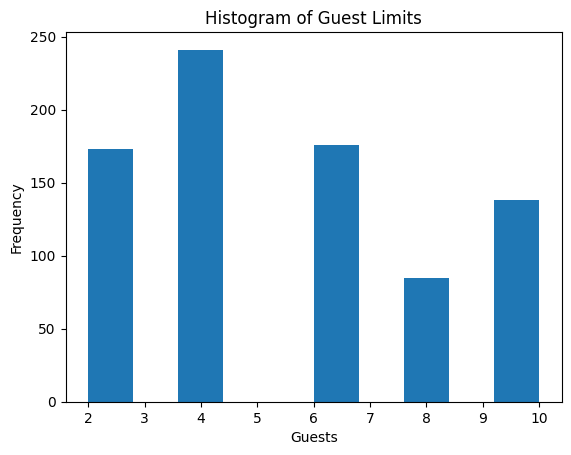

In [ ]:
plt.hist(df_vacation["Guest limit"])
plt.title('Histogram of Guest Limits')
plt.xlabel('Guests')
plt.ylabel('Frequency')

### Average Location
The latitude and longitude variables were plotted on a scatter plot using matplotlibs.pyplot, as it allows for an easy visualization of the distribution of locations for short-term rental properties. The mean operator was then used to determine the mean latitude and mean longitude for all short-term rental properties. The mean latitude and longitude, which was determined to be (29.956069043236788, -90.0724378770686), is represented by the red datapoint on the scatter plot. Standard deviation for both latitude and longitude were calculated using the std operator.


Mean Longitude: -90.0724378770686
Mean Latitude: 29.956069043236788
Standard Deviation of Latitude: 0.025543364571551423
Standard Deviation of Longitude: 0.038847863375857536


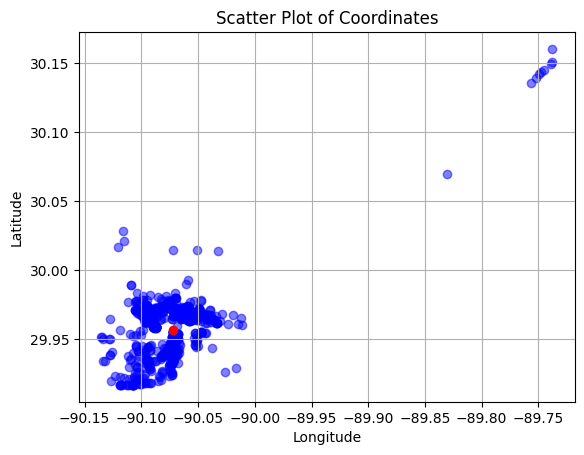

In [ ]:
mean_lon = df_merge.Longitude.mean()
print("Mean Longitude:", mean_lon)
mean_lat = df_merge.Latitude.mean()
print("Mean Latitude:", mean_lat)
std_lat = df_merge.Latitude.std()
print("Standard Deviation of Latitude:", std_lat)
std_lon = df_merge.Longitude.std()
print("Standard Deviation of Longitude:", std_lon)


fig = plt.scatter(df_merge['Longitude'], df_merge['Latitude'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.scatter(mean_lon,mean_lat, color = "red")
plt.show()

###Summary Statistics
Mean Longitude: -90.0724378770686

Mean Latitude: 29.956069043236788

Standard Deviation of Latitude: 0.025543364571551423

Standard Deviation of Longitude: 0.038847863375857536

Data about bars was also taken from the City of New Orleans Open Data (data.nola.gov). We will load the data, which is in a CSV file. Data about the locations of bars will be used in the predictive modeling to determine if the proximity of bars is influential on the volume of short-term rental properties.

,the_geom,OBJECTID,OwnerName,BusinessName,Address,Suite,City,State,Zip,BusinessType,Lat,Lon
0,POINT (-90.04288040507 29.962397316802),7,2309 Jeff LLC dba Pizza Delicious,2309 Jeff LLC dba Pizza Delicious,617 Piety St,NaN,New Orleans,LA,70117.0,1105 - Full Service Restaurants (table service...,29.962392,-90.042875
1,POINT (-90.065096811452 29.982223420835),353,Hammad Saed,Cousin's Foodmart Inc dba Brooks Grocery,2434 Allen St,NaN,New Orleans,LA,70119.0,1106 - Supermarket & Other Grocery (except Con...,29.982218,-90.065091
2,POINT (-90.055055608292 29.963771117085),6,2301 Chartres LLC dba Friendly Bar,2301 Chartres LLC dba Friendly Bar,2301 Chartres St,NaN,New Orleans,LA,70117.0,1126 - Drinking Places (Alcoholic Beverages),29.963766,-90.055050
3,POINT (-90.070761811938 29.952739713407),3,Mousa Ramzy,148 Carondelet St LLC d/b/a Brothers Food Mart...,148 Carondelet St,NaN,New Orleans,LA,70130.0,1106 - Supermarket & Other Grocery (except Con...,29.952734,-90.070756
4,POINT (-90.067321911652 29.951344013744),2,114 Magazine Operating Company LLC dba Best W...,114 Magazine Operating Company LLC dba Best W...,114 Magazine St,NaN,New Orleans,LA,70130.0,4701 - Hotels (except Casino Hotels) & Motels,29.951339,-90.067316
...,...,...,...,...,...,...,...,...,...,...,...,...
1706,POINT (-90.032658202049 29.961494916807),346,Baiamonte LLC dba Jack Dempsey's Restaurant,Baiamonte LLC dba Jack Dempsey's Restaurant,738 Poland Ave,NaN,New Orleans,LA,70117.0,1105 - Full Service Restaurants (table service...,29.961489,-90.032653
1707,POINT (-90.091132820478 30.023300228151),1336,The Birds Nest Cafe LLC,The Birds Nest Cafe LLC,6508 Spanish Fort Blvd,NaN,New Orleans,LA,70124.0,1101 - Convenience Stores,30.023295,-90.091127
1708,POINT (-90.062614510616 29.967985417741),1553,Tran Quang D.,Dexemca Inc dba King Supermarket,1143 Saint Bernard Ave,NaN,New Orleans,LA,70116.0,1106 - Supermarket & Other Grocery (except Con...,29.967980,-90.062609
1709,POINT (-90.063659510467 29.956114014447),466,"Cafe Maspero Decatur, LLC dba Cafe Maspero","Cafe Maspero Decatur, LLC dba Cafe Maspero",601 Decatur St,NaN,New Orleans,LA,70130.0,1105 - Full Service Restaurants (table service...,29.956109,-90.063654


Text(0.5, 1.0, 'Scatter Plot of Bars')

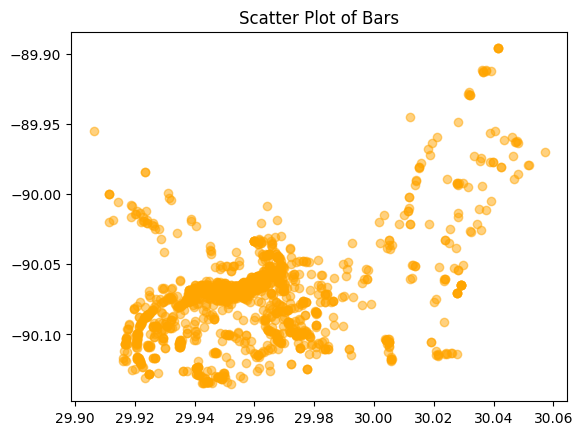

In [ ]:
bars_df = pd.read_csv('Alcohol_Beverage_Outlets_20240403.csv')
display(bars_df)
#outlier
bars_df = bars_df.drop(bars_df[bars_df['Lat'] > 30.1].index)
plt.scatter(bars_df['Lat'], bars_df['Lon'], color='orange', alpha=0.5)
plt.title('Scatter Plot of Bars')


#### Locations of Bars Against Locations of Short-Term Rental Properties
The latitudes and longitudes of grocery stores were then plotted against the existing scatter plot of latitudes and longitudes of short-term rental properties. Similarly, this scatter plot creates a simple visualization of the locations of each grocery store, as well as how close grocery stores are to short-term rental properties based on their overlap in the scatter plot.

Text(0.5, 1.0, 'Scatter Plot of Bars and Rental Properties')

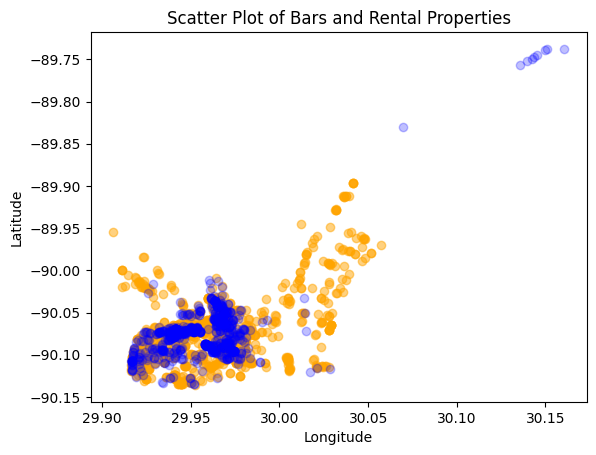

In [ ]:
fig, ax = plt.subplots()
ax.scatter(bars_df['Lat'], bars_df['Lon'], color='orange', alpha=0.5)
ax.scatter(df_merge['Latitude'], df_merge['Longitude'],color='blue', alpha=0.25)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.title('Scatter Plot of Bars and Rental Properties')


Data about grocery stores was also taken from the City of New Orleans Open Data (data.nola.gov). We will load the data, which is in a CSV file. Data about the locations of grocery stores will be used in the predictive modeling to determine if the proximity of grocery stores is influential on the volume of short-term rental properties.

,the_geom,OBJECTID,Business Name,Address,Suite,Zip,Phone Number,Latitude,Longitude
0,POINT (-90.010462442348 30.011375732797),62,CHEF FUEL LLC,6711 CHEF MENTEUR HWY,NaN,70126,NaN,29.933805,-90.131708
1,POINT (-89.999912773961 29.911395962499),1,A & J'S MART,5163 GENERAL DE GAULLE DR,NaN,70131,504-394-4410,29.952229,-90.072236
2,POINT (-90.082568661226 29.942860681516),212,PROJECT FOOD STORE #2,2238 MARTIN LUTHER KING JR BLVD,NaN,70113,504-586-1762,29.966833,-90.053567
3,POINT (-89.818452798836 30.070799135257),26,BIG BOY DISTRIBUTORS,4441 SAN GIORGIO ST,NaN,70129,504-628-5689,29.926084,-90.026246
4,POINT (-90.076989294557 29.951922709288),53,CANSECO'S CARROLLTON MARKET,1133 S CARROLLTON AVE AVE,NaN,70118,NaN,29.942371,-90.075821
...,...,...,...,...,...,...,...,...,...
305,POINT (-90.07722986226 29.96725599215),50,CAJUN WILLS,2127 ORLEANS AVE,NaN,70116,504-821-6386,29.969244,-90.066650
306,POINT (-90.058418996107 29.961028678935),11,ALTALIEH CONVENIENCE,87 FRENCH MARKET PL,NaN,70116,504-339-8438,29.967528,-90.061354
307,POINT (-90.100097872802 29.921048906742),15,AVENUE MART LLC,4237 MAGAZINE ST,NaN,70115,(504899-8579,29.939262,-90.078997
308,POINT (-90.116208668355 29.950540239962),34,BROADWAY FOOD STORE,2223 BROADWAY ST,NaN,70118-5409,504-861-0505,29.941357,-90.069799


Text(0.5, 1.0, 'Scatter Plot of Grocery Stores')

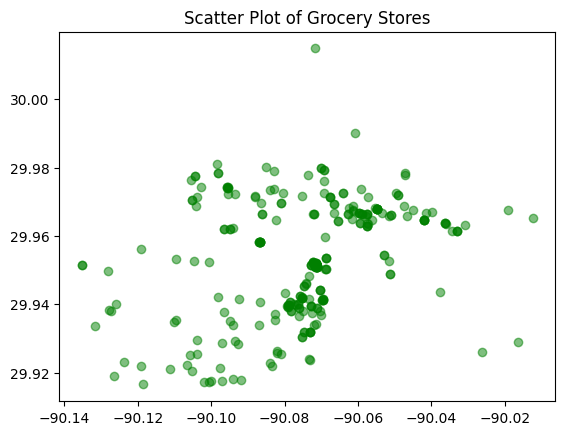

In [ ]:
grocery_df = pd.read_csv('Grocery_Stores_20240403.csv')
# display(grocery_df)

grocery_df["Latitude"] = 0
grocery_df["Longitude"] = 0
grocery_df["Latitude"] = grocery_df.the_geom.str[7:23]
grocery_df["Longitude"] = grocery_df.the_geom.str[24:39]

grocery_df["Longitude"]= df_merge["Longitude"].astype(float)
grocery_df["Latitude"]= df_merge["Latitude"].astype(float)
display(grocery_df)

plt.scatter(grocery_df['Longitude'], grocery_df['Latitude'], color='green', alpha=0.5)
plt.title('Scatter Plot of Grocery Stores')


### Locations of Grocery Stores Against Locations of Short-Term Rental Properties
The latitudes and longitudes of bars were then plotted against the existing scatter plot of latitudes and longitudes of short-term rental properties. Similarly, this scatter plot shows the overlap of the locations of grocery stores and short-term rental properties.

Text(0.5, 1.0, 'Scatter Plot of Grocery Stores and Rental Properties')

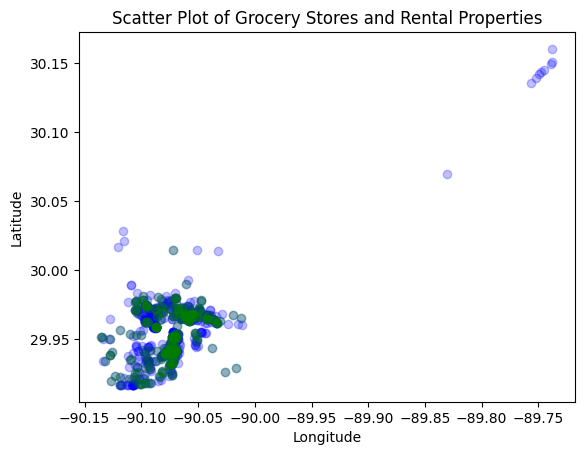

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_merge['Longitude'], df_merge['Latitude'], color='blue', alpha=0.25)
ax.scatter(grocery_df['Longitude'], grocery_df['Latitude'], color='green', alpha=0.25)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Scatter Plot of Grocery Stores and Rental Properties')


Although this initial visualization shows the overlap in locations of grocery stores, bars, and short-term rental properties, more analysis is needed to determine which variable, grocery stores or bars, is actually more predictive of a high volume of short-term rental properties.

### Hypothesis
The group hypothesized that the proximity of bars are more predictive of the presence of a short-term rental property because the average location of a short-term rental property is in the French Quarter, as well as because of the nature of tourism in New Orleans.

Data from the short-term rental property, bars, and grocery stores data frames were used to create a K-Nearest Neighbor predictive model which predicts, based on latitude and longitude, whether a bar or grocery store is likely to be within a close range of the location of a short-term rental property. First, the predictive model was applied to the short-term rental property and bar data frames.

Then, the value count operator was used to count the number of bars that are within a close range of a short-term rental property. The results were separated into binary categories, 0 meaning that a bar is not within a close range of a short-term rental property, and 1 meaning that a bar is within a close range of a short-term rental property.

It was determined that for both latitude and longitude variables, most bars are within a close range of a short-term rental property.

Next, the predictive model was applied to the short-term rental property and grocery store data frames.

In [ ]:
df_model = df_merge[["Address","Permit Type", "Latitude", "Longitude"]]
df_model["Bar Latitude"] = 0
df_model["Grocery Latitude"] = 0
df_model["Bar Longitude"] = 0
df_model["Grocery Longitude"] = 0
display(df_model)

<ipython-input-171-6f85af6fdb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"] = 0
<ipython-input-171-6f85af6fdb1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Grocery Latitude"] = 0
<ipython-input-171-6f85af6fdb1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Address,Permit Type,Latitude,Longitude,Bar Latitude,Grocery Latitude,Bar Longitude,Grocery Longitude
0,305 Lowerline St Apt A,Short Term Rental,29.933805,-90.131708,0,0,0,0
1,300 Baronne St Apt D,Short Term Rental Commercial Owner,29.952229,-90.072236,0,0,0,0
2,2425 Burgundy St,Short Term Rental,29.966833,-90.053567,0,0,0,0
3,3014 Amazon St,Short Term Rental,29.926084,-90.026246,0,0,0,0
4,1728 Clio St,Short Term Rental,29.942371,-90.075821,0,0,0,0
...,...,...,...,...,...,...,...,...
826,8112 Breakwater Dr,Short Term Rental Commercial Owner,30.028417,-90.116341,0,0,0,0
827,2730 Toulouse St,Short Term Rental Commercial Owner,29.970061,-90.084898,0,0,0,0
828,801 Patterson St Apt 101,Short Term Rental Commercial Owner,29.954944,-90.047677,0,0,0,0
829,1413 Carondelet St,Short Term Rental Commercial Owner,29.940322,-90.076556,0,0,0,0


Before training the team created binary variables to determine whether a bar or a grocery store was in close proximity to the property. There are 4 relevent varibables, Bar Latitude, Bar Longitude, Grocery Latitude and Grocery Longitude. A 1 represents a bar/grocery close by and a 0 respresents no bar/grocery store close by

In [ ]:
rlen = df_model.value_counts().sum()
val = 1/1400
val2 = 1/480
glen = grocery_df.value_counts().sum()
blen = bars_df.value_counts().sum()
for i in range(rlen):
  curL = df_model.Latitude.iloc[i]
  for j in range(blen):
    barval =  bars_df.Lat.iloc[j]
    if(barval < (curL)):
      if(barval >= (curL - val)):
        df_model["Bar Latitude"].iloc[i] = 1
    else:
      if (barval <= (curL + val)):
        df_model["Bar Latitude"].iloc[i] = 1
  for k in range(glen):
    gval =  grocery_df.Latitude.iloc[k]
    if(gval < (curL)):
      if(gval >= (curL - val2)):
        df_model["Grocery Latitude"].loc[i] = 1
    else:
      if (gval <= (curL + val2)):
        df_model["Grocery Latitude"].loc[i] = 1


Streaming output truncated to the last 5000 lines.
<ipython-input-172-2fb30dfb2f3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-172-2fb30dfb2f3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-172-2fb30dfb2f3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-172-2fb30dfb2

In [ ]:
rlen = df_model.value_counts().sum()
val = 1/750
val2 = 1/1400
print(val)
glen = grocery_df.value_counts().sum()
blen = bars_df.value_counts().sum()
for i in range(rlen):
  curL = df_model.Longitude.iloc[i]
  for j in range(blen):
    barval =  bars_df.Lon.iloc[j]
    if(barval < (curL)):
      if(barval >= (curL - val2)):
        df_model["Bar Longitude"].iloc[i] = 1
    else:
      if (barval <= (curL + val2)):
        df_model["Bar Longitude"].iloc[i] = 1
  for k in range(glen):
    gval =  grocery_df.Longitude.iloc[k]
    if(gval < (curL)):
      if(gval >= (curL - val)):
        df_model["Grocery Longitude"].loc[i] = 1
    else:
      if (gval <= (curL + val)):
        df_model["Grocery Longitude"].loc[i] = 1


0.0013333333333333333


Streaming output truncated to the last 5000 lines.
<ipython-input-173-46d1909ff2b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Longitude"].iloc[i] = 1
<ipython-input-173-46d1909ff2b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Longitude"].iloc[i] = 1
<ipython-input-173-46d1909ff2b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Longitude"].iloc[i] = 1
<ipython-input-173-46d190

Then, the value count operator was used to count the number of grocery stores and bars that are within a close range of a short-term rental property. Again, the results were separated into binary categories, 0 meaning that a grocery store is not within a close range of a short-term rental property, and 1 meaning that a grocery store is within a close range of a short-term rental property.

In [ ]:
print(df_model["Bar Latitude"].value_counts())
print(df_model["Bar Longitude"].value_counts())
print(df_model["Grocery Longitude"].value_counts())
print(df_model["Grocery Latitude"].value_counts())

Bar Latitude
1    657
0    174
Name: count, dtype: int64
Bar Longitude
1    653
0    178
Name: count, dtype: int64
Grocery Longitude
0    489
1    342
Name: count, dtype: int64
Grocery Latitude
1    506
0    325
Name: count, dtype: int64


The team split the data into a training and validation set to train and test the model.

In [ ]:
features = [ "Latitude", "Longitude"]
lenmodel =int((df_model.value_counts().sum())/2) #split the data into 2 parts
df_train = df_model[:lenmodel] #training set
df_val = df_model[lenmodel:] #validation set
Xb_train= df_train[features]
yb_train1 = df_train["Bar Longitude"]
yb_train2 = df_train["Bar Latitude"]
yb_train3 = df_train["Bar Longitude"]
yb_train4 = df_train["Bar Latitude"]
display(df_val) #Validation set
display(df_train) #Training set


,Address,Permit Type,Latitude,Longitude,Bar Latitude,Grocery Latitude,Bar Longitude,Grocery Longitude
415,3412 Prytania St,Short Term Rental Commercial Owner,29.926615,-90.091187,1,1,0,0
416,337 S Telemachus St,Short Term Rental Residential Owner,29.969605,-90.099054,1,0,1,0
417,3663 Tchoupitoulas St,Short Term Rental Commercial Owner,29.917999,-90.091897,0,0,0,0
418,816 Elysian Fields Ave,Short Term Rental Commercial Owner,29.965955,-90.056912,1,1,0,1
419,2228 Gravier St Apt 304,Short Term Rental,29.958254,-90.086799,1,0,0,0
...,...,...,...,...,...,...,...,...
826,8112 Breakwater Dr,Short Term Rental Commercial Owner,30.028417,-90.116341,1,0,1,0
827,2730 Toulouse St,Short Term Rental Commercial Owner,29.970061,-90.084898,1,0,1,0
828,801 Patterson St Apt 101,Short Term Rental Commercial Owner,29.954944,-90.047677,1,0,0,0
829,1413 Carondelet St,Short Term Rental Commercial Owner,29.940322,-90.076556,1,1,1,1


,Address,Permit Type,Latitude,Longitude,Bar Latitude,Grocery Latitude,Bar Longitude,Grocery Longitude
0,305 Lowerline St Apt A,Short Term Rental,29.933805,-90.131708,1,1,1,1
1,300 Baronne St Apt D,Short Term Rental Commercial Owner,29.952229,-90.072236,1,1,1,1
2,2425 Burgundy St,Short Term Rental,29.966833,-90.053567,1,1,0,1
3,3014 Amazon St,Short Term Rental,29.926084,-90.026246,1,1,0,1
4,1728 Clio St,Short Term Rental,29.942371,-90.075821,0,1,1,1
...,...,...,...,...,...,...,...,...
410,1027 Touro St Apt 2B,Short Term Rental Commercial Owner,29.968017,-90.059073,1,1,1,1
411,4406 S Carrollton Ave,Short Term Rental,29.971285,-90.103693,0,0,1,0
412,326 S Broad St,Short Term Rental Commercial Owner,29.963190,-90.089151,1,1,1,0
413,2605 Marais St,Short Term Rental Commercial Owner,29.969931,-90.049622,1,0,0,0


In [ ]:
df_new = df_val[[ "Latitude", "Longitude"]]
display(df_new) #Using Latitude and Longitude to train the model
lenmodel = df_new.value_counts().sum()

,Latitude,Longitude
415,29.926615,-90.091187
416,29.969605,-90.099054
417,29.917999,-90.091897
418,29.965955,-90.056912
419,29.958254,-90.086799
...,...,...
826,30.028417,-90.116341
827,29.970061,-90.084898
828,29.954944,-90.047677
829,29.940322,-90.076556


Next, the team trained a 5 Nearest Neighbors Classification model for each of the 4 relevant variables

In [ ]:
scaler = StandardScaler()
scaler.fit(Xb_train)
Xb_train_sc = scaler.transform(Xb_train)

# fit the 5-nearest neighbors model for Bar Longitude
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xb_train_sc, yb_train1)
BLon = []
for i in range(lenmodel):
  x_new = pd.DataFrame(df_new.iloc[i]).T
  x_new_sc = scaler.transform(x_new)
  BLon.append(model.predict(x_new_sc))
print(BLon)

[array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), arr

In [ ]:
scaler = StandardScaler()
scaler.fit(Xb_train)
Xb_train_sc = scaler.transform(Xb_train)

# fit the 5-nearest neighbors model for Bar Latitude
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xb_train_sc, yb_train2)
BLat = []
for i in range(lenmodel):
  x_new = pd.DataFrame(df_new.iloc[i]).T
  x_new_sc = scaler.transform(x_new)
  BLat.append(model.predict(x_new_sc))
print(BLat)

[array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), arr

In [ ]:
scaler = StandardScaler()
scaler.fit(Xb_train)
Xb_train_sc = scaler.transform(Xb_train)

# fit the 5-nearest neighbors model Grocery Latittude
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xb_train_sc, yb_train1)
GLat = []
for i in range(lenmodel):
  x_new = pd.DataFrame(df_new.iloc[i]).T
  x_new_sc = scaler.transform(x_new)
  GLat.append(model.predict(x_new_sc))
print(GLat)

[array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), arr

In [ ]:

scaler = StandardScaler()
scaler.fit(Xb_train)
Xb_train_sc = scaler.transform(Xb_train)

# fit the 5-nearest neighbors model for Grocery Longitude
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xb_train_sc, yb_train3)
GLon = []
for i in range(lenmodel):
  x_new = pd.DataFrame(df_new.iloc[i]).T
  x_new_sc = scaler.transform(x_new)
  GLon.append(model.predict(x_new_sc))
print(GLon)

[array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), arr

The team created a new data frame to compare the predicted values to the actual values

In [ ]:
df_new["Bar Longitude"] = BLon
df_new["Bar Latitude"] = BLat
df_new["Grocery Longitude"] = GLon
df_new["Grocery Latitude"] = GLat
df_val = df_val[["Latitude", "Longitude", "Bar Latitude", "Bar Longitude", "Grocery Latitude", "Grocery Longitude"]]
df_pred = df_new.merge(df_val, left_on="Latitude", right_on="Latitude", how='inner')
df_pred = df_pred.drop(["Longitude_y"], axis=1) #repeat value
display(df_pred) #the predictions and the actual values in one data frame

<ipython-input-181-a691828352f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Bar Longitude"] = BLon
<ipython-input-181-a691828352f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Bar Latitude"] = BLat
<ipython-input-181-a691828352f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,Latitude,Longitude_x,Bar Longitude_x,Bar Latitude_x,Grocery Longitude_x,Grocery Latitude_x,Bar Latitude_y,Bar Longitude_y,Grocery Latitude_y,Grocery Longitude_y
0,29.926615,-90.091187,[1],[1],[1],[1],1,0,1,0
1,29.969605,-90.099054,[1],[0],[1],[1],1,1,0,0
2,29.917999,-90.091897,[1],[0],[1],[1],0,0,0,0
3,29.965955,-90.056912,[1],[1],[1],[1],1,0,1,1
4,29.958254,-90.086799,[0],[1],[0],[0],1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
417,30.028417,-90.116341,[1],[1],[1],[1],1,1,0,0
418,29.970061,-90.084898,[1],[1],[1],[1],1,1,0,0
419,29.954944,-90.047677,[1],[1],[1],[1],1,0,0,0
420,29.940322,-90.076556,[1],[1],[1],[1],1,1,1,1


### Accuracy Measurement

In [ ]:
AccuracyBarLon = 0
AccuracyBarLat = 0
AccuracyGLon = 0
AccuracyGLat = 0
for i in range(lenmodel):
  if(df_pred["Bar Longitude_x"].iloc[i] == df_pred["Bar Longitude_y"].iloc[i]):
    AccuracyBarLon += 1
  if(df_pred["Bar Latitude_x"].iloc[i] == df_pred["Bar Latitude_y"].iloc[i]):
    AccuracyBarLat += 1
  if(df_pred["Grocery Longitude_x"].iloc[i] == df_pred["Grocery Longitude_y"].iloc[i]):
    AccuracyGLon += 1
  if(df_pred["Grocery Latitude_x"].iloc[i] == df_pred["Grocery Latitude_y"].iloc[i]):
    AccuracyGLat += 1
print("The amount of correct predictions for Bar Longitude: ", AccuracyBarLon," Precision value: ", (AccuracyBarLon/lenmodel))
print("The amount of correct predictions for Bar Latitude: ", AccuracyBarLat," Precision value: ", (AccuracyBarLat/lenmodel))
print("The amount of correct predictions for Grocery Longitude: ", AccuracyGLon," Precision value: ", (AccuracyGLon/lenmodel))
print("The amount of correct predictions for Grocery Latitude: ", AccuracyGLat," Precision value: ", (AccuracyGLat/lenmodel))



The amount of correct predictions for Bar Longitude:  331  Precision value:  0.7956730769230769
The amount of correct predictions for Bar Latitude:  367  Precision value:  0.8822115384615384
The amount of correct predictions for Grocery Longitude:  216  Precision value:  0.5192307692307693
The amount of correct predictions for Grocery Latitude:  257  Precision value:  0.6177884615384616


##Conclusion
This supports the hypothesis that the proximity of bars are more predictive of the presence of a short-term rental property. This model indicates that the locations of bars are predictive of the location of short-term rental property.

##Further Resources

If the reader is interested in this topic and would like to learn more about related works explore the links below

https://www.housingnola.org/fluxconsole/files/item/87/50100/HRA_New%20Orleans%20Short%20Term%20Rental%20Housing%20Study%20FINAL.pdf

https://www.fox8live.com/2024/02/28/federal-judge-rules-favor-new-orleans-short-term-rental-rules/

https://www.bgr.org/report-index/the-road-home-rental-housing-program-consequences-for-new-orleans/
